In [1]:
import tensorflow.keras 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
from tensorflow.keras import losses

/Users/amodwani/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/amodwani/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/amodwani/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/amodwani/opt/anaconda3/lib/python3.7/site-packages/ten

In [2]:
df = pd.read_csv('concrete_data.csv')

In [3]:
print(df.columns)
df.head()

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


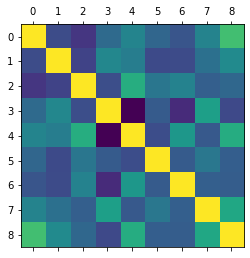

In [4]:
plt.matshow(df.corr())
plt.show()

In [7]:
X = df[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age']]

y = df['Strength'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

In [9]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X.shape[1]))
model.add(Dense(units=10, activation='softmax'))
model.add(Dense(units=1, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:

model.compile(loss=losses.mean_squared_error,
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train, epochs=50, batch_size=8,verbose=0)

In [12]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)
loss_and_metrics

258/258 [==============================] - 0s 90us/sample - loss: 1477.2234 - acc: 0.0000e+00


[1477.223407124364, 0.0]

In [13]:
y_pred = model.predict(X_test)

In [14]:
mean_squared_error(y_test,y_pred)

1477.223427131783

In [15]:
#to create loop for 50 times

In [16]:
mean_squared_error_list = []

for i in range(0,50):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30)
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=X.shape[1]))
    model.add(Dense(units=10, activation='relu'))
    model.add(Dense(units=1, activation='softmax'))
    model.compile(loss=losses.mean_squared_error,
              optimizer='adam',
              metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=50, batch_size=8,verbose=0)
    y_pred = model.predict(X_test)
    mean_squared_error_list.append(mean_squared_error(y_test,y_pred))


In [17]:
print('Mean of the mean_squared_error_list : ',np.mean(mean_squared_error_list))

Mean of the mean_squared_error_list :  1485.2725811779935


In [18]:
print('Standaed Devatation of the mean_squared_error_list : ',np.std(mean_squared_error_list))

Standaed Devatation of the mean_squared_error_list :  63.33550558030976


In [19]:
#part B

In [20]:
X = df[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age']]

y = df['Strength'].values

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X = scaler.fit_transform(X)

In [22]:
mean_squared_error_list = []

for i in range(0,50):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30)
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=X.shape[1]))
    model.add(Dense(units=10, activation='relu'))
    model.add(Dense(units=1, activation='softmax'))
    model.compile(loss=losses.mean_squared_error,
              optimizer='adam',
              metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=50, batch_size=8,verbose=0)
    y_pred = model.predict(X_test)
    mean_squared_error_list.append(mean_squared_error(y_test,y_pred))


In [23]:
print('Mean of the mean_squared_error_list : ',np.mean(mean_squared_error_list))

Mean of the mean_squared_error_list :  1486.8257689126215


In [24]:
print('Standaed Devatation of the mean_squared_error_list : ',np.std(mean_squared_error_list))

Standaed Devatation of the mean_squared_error_list :  67.868831129054


In [25]:
#Part C

In [26]:
mean_squared_error_list = []

for i in range(0,50):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30)
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=X.shape[1]))
    model.add(Dense(units=10, activation='relu'))
    model.add(Dense(units=1, activation='softmax'))
    model.compile(loss=losses.mean_squared_error,
              optimizer='adam',
              metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100, batch_size=8,verbose=0)
    y_pred = model.predict(X_test)
    mean_squared_error_list.append(mean_squared_error(y_test,y_pred))
    
print('Mean of the mean_squared_error_list : ',np.mean(mean_squared_error_list))
print('Standaed Devatation of the mean_squared_error_list : ',np.std(mean_squared_error_list))

Mean of the mean_squared_error_list :  1476.0271602718444
Standaed Devatation of the mean_squared_error_list :  57.41518066484466


In [27]:
#part D

In [28]:
from tqdm import tqdm
mean_squared_error_list = []

for i in tqdm(range(0,50)):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30)
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=X.shape[1]))
    model.add(Dense(units=10, activation='relu'))
    model.add(Dense(units=10, activation='relu'))
    model.add(Dense(units=10, activation='relu'))
    model.add(Dense(units=1, activation='softmax'))
    model.compile(loss=losses.mean_squared_error,
              optimizer='adam',
              metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100, batch_size=8,verbose=0)
    y_pred = model.predict(X_test)
    mean_squared_error_list.append(mean_squared_error(y_test,y_pred))
    
print('Mean of the mean_squared_error_list : ',np.mean(mean_squared_error_list))
print('Standaed Devatation of the mean_squared_error_list : ',np.std(mean_squared_error_list))

100%|██████████| 50/50 [1:16:38<00:00, 91.97s/it] 

Mean of the mean_squared_error_list :  1489.5274158446598
Standaed Devatation of the mean_squared_error_list :  61.12081898130612
